In [ ]:
import math
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

The sel-attention operation do not include any information about the order of the input data in sequence. For this, the techinque Postion Enconding (PE) calculating $p \in R^{n}$   

$$ PE_{(pos, 2i)} = \textbf{p}_i = \sin \left( \frac{pos}{10000^{\frac{2i}{d_{model}}}} \right) $$

$$ PE_{(pos, 2i)} = \textbf{p}_{i+1} = \cos \left( \frac{pos}{10000^{\frac{2i}{d_{model}}}} \right) $$


*   pos: position of an object in the input sequence
*   $d_{model}$: dimensión of the output embedding space
*   $i$: position along the embedding vector dimension ranging from $0$ to $\left( \frac{d}{2} - 1 \right)$





In [ ]:
max_sequence_length = 10
d_model = 6

In [ ]:
pe = torch.zeros(max_sequence_length, d_model)
pe

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
pos = torch.arange(max_sequence_length).unsqueeze(1)
pos

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [ ]:
div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
div_term

tensor([1.0000, 0.0464, 0.0022])

In [ ]:
pe[:, 0::2] = torch.sin(pos * div_term)
pe[:, 1::2] = torch.cos(pos * div_term)

print(pe)

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])


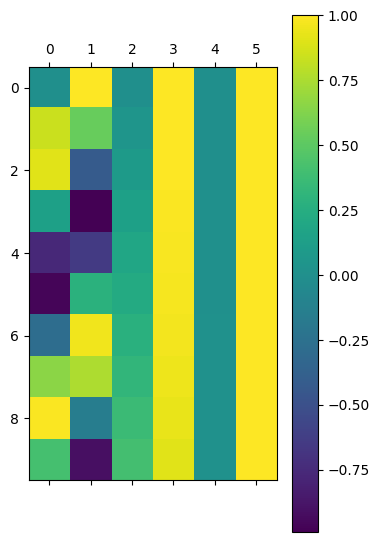

In [ ]:
plt.matshow(pe.numpy())
plt.gcf()
plt.colorbar()
plt.show()

In [ ]:
class PositionalEncoding(nn.Module):

  def __init__(self, d_model, max_sequence_length):
    super().__init__()
    self.max_sequence_length = max_sequence_length
    self.d_model = d_model

  def get_position_encoding(self):
    
    pe = torch.zeros(self.max_sequence_length, self.d_model)
    pos = torch.arange(self.max_sequence_length).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, self.d_model, 2) * -(math.log(10000.0) / self.d_model))

    pe[:, 0::2] = torch.sin(pos * div_term)
    pe[:, 1::2] = torch.cos(pos * div_term)
    
    return pe

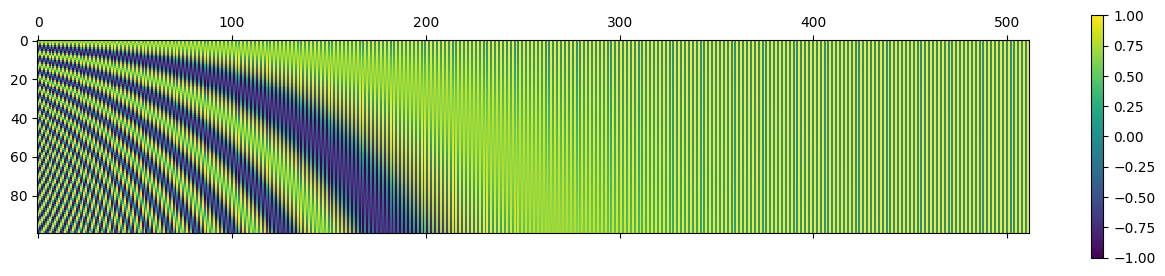

In [ ]:
pe = PositionalEncoding(d_model=512, max_sequence_length=100).get_position_encoding()

plt.matshow(pe.numpy())
plt.gcf()
plt.colorbar()
plt.show()
